In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_merged_data = pd.read_csv("train_df.csv", encoding_errors = "ignore")
test_merged_data = pd.read_csv("test_df.csv", encoding_errors = "ignore")

In [4]:
train_merged_data

,Date,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,PromoInterval,Year,Month,weekDay,IsWeekday,Quarter,SalesPerCustomer,IsMonthStart,IsMonthMiddle,IsMonthEnd
0,2013-01-01,1115,2,0,0,1,1,3,2,5350.0,...,2,2013,1,1,1,1,9.493619,1,0,0
1,2013-01-01,379,2,0,0,1,1,3,0,6630.0,...,3,2013,1,1,1,1,9.493619,1,0,0
2,2013-01-01,378,2,0,0,1,1,0,2,2140.0,...,3,2013,1,1,1,1,9.493619,1,0,0
3,2013-01-01,377,2,0,0,1,1,0,2,100.0,...,0,2013,1,1,1,1,9.493619,1,0,0
4,2013-01-01,376,2,0,0,1,1,0,0,160.0,...,3,2013,1,1,1,1,9.493619,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,2015-07-31,746,5,1,1,0,1,3,2,4330.0,...,2,2015,7,31,0,3,14.235110,0,0,1
1017205,2015-07-31,747,5,1,1,0,1,2,2,45740.0,...,3,2015,7,31,0,3,12.963680,0,0,1
1017206,2015-07-31,748,5,1,1,0,1,3,0,2380.0,...,1,2015,7,31,0,3,12.942907,0,0,1
1017207,2015-07-31,742,5,1,1,0,1,3,2,4380.0,...,3,2015,7,31,0,3,10.295276,0,0,1


In [5]:
test_merged_data

,Date,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,Promo2SinceYear,PromoInterval,Year,Month,weekDay,IsWeekday,Quarter,IsMonthStart,IsMonthMiddle,IsMonthEnd
0,2015-08-01,1115,6,1.0,0,0,1,3,2,5350.0,...,2012.000000,2,2015,8,1,0,3,1,0,0
1,2015-08-01,378,6,1.0,0,0,0,0,2,2140.0,...,2011.820926,3,2015,8,1,0,3,1,0,0
2,2015-08-01,377,6,1.0,0,0,0,0,2,100.0,...,2010.000000,0,2015,8,1,0,3,1,0,0
3,2015-08-01,373,6,1.0,0,0,0,3,2,11120.0,...,2012.000000,1,2015,8,1,0,3,1,0,0
4,2015-08-01,372,6,1.0,0,0,0,3,2,4880.0,...,2014.000000,1,2015,8,1,0,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,2015-09-17,732,4,1.0,1,0,0,0,2,35280.0,...,2011.820926,3,2015,9,17,1,3,0,1,0
41084,2015-09-17,731,4,1.0,1,0,0,0,0,15270.0,...,2014.000000,1,2015,9,17,1,3,0,1,0
41085,2015-09-17,729,4,1.0,1,0,0,2,2,8980.0,...,2011.820926,3,2015,9,17,1,3,0,1,0
41086,2015-09-17,727,4,1.0,1,0,0,0,0,2050.0,...,2011.820926,3,2015,9,17,1,3,0,1,0


In [6]:
train_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 25 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Date                       1017209 non-null  object 
 1   Store                      1017209 non-null  int64  
 2   DayOfWeek                  1017209 non-null  int64  
 3   Open                       1017209 non-null  int64  
 4   Promo                      1017209 non-null  int64  
 5   StateHoliday               1017209 non-null  int64  
 6   SchoolHoliday              1017209 non-null  int64  
 7   StoreType                  1017209 non-null  int64  
 8   Assortment                 1017209 non-null  int64  
 9   CompetitionDistance        1017209 non-null  float64
 10  CompetitionOpenSinceMonth  1017209 non-null  float64
 11  CompetitionOpenSinceYear   1017209 non-null  float64
 12  Promo2                     1017209 non-null  int64  
 13  Promo2SinceW

In [7]:
test_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       41088 non-null  object 
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Open                       41088 non-null  float64
 4   Promo                      41088 non-null  int64  
 5   StateHoliday               41088 non-null  int64  
 6   SchoolHoliday              41088 non-null  int64  
 7   StoreType                  41088 non-null  int64  
 8   Assortment                 41088 non-null  int64  
 9   CompetitionDistance        41088 non-null  float64
 10  CompetitionOpenSinceMonth  41088 non-null  float64
 11  CompetitionOpenSinceYear   41088 non-null  float64
 12  Promo2                     41088 non-null  int64  
 13  Promo2SinceWeek            41088 non-null  flo

In [8]:
train_merged_data.set_index('Date', inplace=True)
train_merged_data.sort_index(inplace=True)

In [9]:
X = train_merged_data[['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
       'weekDay', 'IsWeekday', 'Quarter', 'IsMonthStart',
       'IsMonthMiddle', 'IsMonthEnd']]
y = train_merged_data['SalesPerCustomer']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [11]:
X_train

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,...,Promo2SinceYear,PromoInterval,Year,Month,weekDay,IsWeekday,Quarter,IsMonthStart,IsMonthMiddle,IsMonthEnd
Date,,,,,,,,,,,,,,,,,,,,,
2013-02-12,886,2,1,0,0,0,0,2,12430.0,10.000000,...,2011.752774,3,2013,2,12,1,1,0,1,0
2013-12-23,66,1,1,0,0,1,3,0,7660.0,7.222866,...,2009.000000,1,2013,12,23,1,4,0,0,0
2013-12-02,509,1,1,1,0,0,0,0,4740.0,7.000000,...,2009.000000,1,2013,12,2,1,4,0,0,0
2014-04-19,5,6,1,0,0,0,0,0,29910.0,4.000000,...,2011.752774,3,2014,4,19,0,2,0,1,0
2014-10-06,853,1,1,1,0,0,0,0,14040.0,7.222866,...,2011.752774,3,2014,10,6,1,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-05-15,493,5,1,0,0,0,3,2,1150.0,7.222866,...,2011.000000,1,2015,5,15,0,2,0,1,0
2015-03-01,1000,7,0,0,0,0,0,2,2230.0,5.000000,...,2014.000000,1,2015,3,1,0,1,1,0,0
2013-12-25,392,3,0,0,3,1,0,0,2120.0,7.222866,...,2011.752774,3,2013,12,25,1,4,0,0,0


In [12]:
X_test

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,...,Promo2SinceYear,PromoInterval,Year,Month,weekDay,IsWeekday,Quarter,IsMonthStart,IsMonthMiddle,IsMonthEnd
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-23,711,4,1,0,0,0,3,0,17110.0,3.000000,...,2010.000000,1,2015,4,23,1,2,0,0,0
2013-12-02,529,1,1,1,0,0,3,2,12920.0,9.000000,...,2011.752774,3,2013,12,2,1,4,0,0,0
2015-01-06,153,2,1,1,0,1,0,0,16240.0,10.000000,...,2011.000000,0,2015,1,6,1,1,0,0,0
2014-10-17,580,5,1,0,0,1,0,2,170.0,2.000000,...,2011.752774,3,2014,10,17,0,4,0,1,0
2013-02-11,508,1,0,0,0,0,0,2,1280.0,7.222866,...,2011.000000,1,2013,2,11,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-05-05,336,7,0,0,0,0,0,0,190.0,7.000000,...,2011.752774,3,2013,5,5,0,2,0,0,0
2013-01-23,46,3,1,1,0,0,2,0,1200.0,9.000000,...,2011.000000,1,2013,1,23,1,1,0,0,0
2014-11-03,373,1,1,1,0,0,3,2,11120.0,7.222866,...,2012.000000,1,2014,11,3,1,4,0,0,0


In [13]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
imputer = SimpleImputer(strategy='mean')
regressor = LinearRegression()

In [14]:
pipeline = Pipeline([
    ('imputer', StandardScaler()),  # Feature scaling (optional)
    ('refressor', regressor)])

In [15]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', StandardScaler()),
                ('refressor', LinearRegression())])

In [17]:
# Get predictions from the pipeline
predictions = pipeline.predict(X_test)

# Assign predictions to a variable (same as y_pred in the original code)
y_pred = predictions

In [18]:
# Calculate the Mean Squared Error
mse_value = mean_squared_error(y_test, y_pred)

# Print the result
print("Mean Squared Error:", mse_value)

Mean Squared Error: 2.721385526934941


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np


X_train_lstm = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_lstm = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

model_lstm = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train_lstm.shape[1], 1)),
    Dense(1)  # Output layer for regression
])

model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train_lstm, y_train, epochs=5, batch_size=32, validation_data=(X_test_lstm, y_test))

Epoch 1/5
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 391s 15ms/step - loss: 927.3323 - val_loss: 4.1366
Epoch 2/5
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 385s 15ms/step - loss: 15.2755 - val_loss: 3.6560
Epoch 3/5
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 399s 16ms/step - loss: 15639393.0000 - val_loss: 2164.0977
Epoch 4/5
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 279s 11ms/step - loss: 959.4130 - val_loss: 9.5831
Epoch 5/5
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 226s 9ms/step - loss: 1303.4656 - val_loss: 1109.0262


In [20]:
from sklearn.metrics import mean_squared_error

# Predict using the trained LSTM model
y_pred_lstm = model_lstm.predict(X_test_lstm)

# Calculate MSE
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
print("Mean Squared Error (LSTM):", mse_lstm)

6358/6358 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step
Mean Squared Error (LSTM): 1109.0256589012554


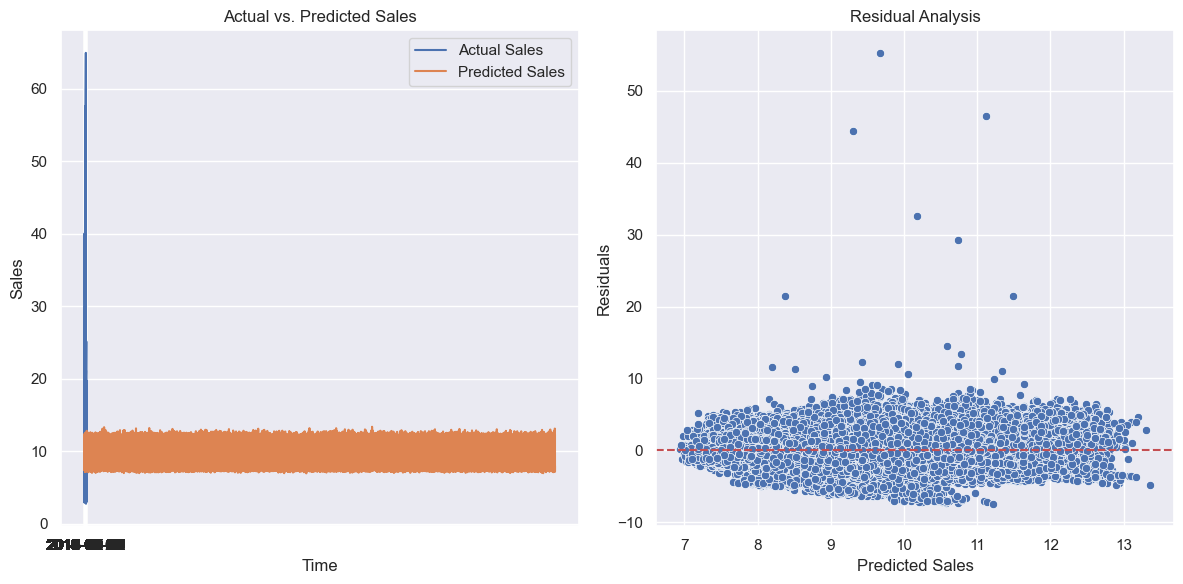

MAE for Store Type '0': 1.282790448266481
MAE for Store Type '1': 1.282790448266481
MAE for Store Type '2': 1.282790448266481
MAE for Store Type '3': 1.282790448266481


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Visualize predictions and residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(y_test, label="Actual Sales")
plt.plot(y_pred, label="Predicted Sales")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.title("Actual vs. Predicted Sales")
plt.legend()

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residual Analysis")

plt.tight_layout()
plt.show()
from sklearn.metrics import mean_absolute_error

# Segment analysis (example)
store_type_segments = train_merged_data.groupby('StoreType')
for store_type, group in store_type_segments:
    segment_mae = mean_absolute_error(y_test, y_pred)
    print(f"MAE for Store Type '{store_type}': {segment_mae}")

In [22]:
train_merged_data.columns

Index(['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
       'weekDay', 'IsWeekday', 'Quarter', 'SalesPerCustomer', 'IsMonthStart',
       'IsMonthMiddle', 'IsMonthEnd'],
      dtype='object')

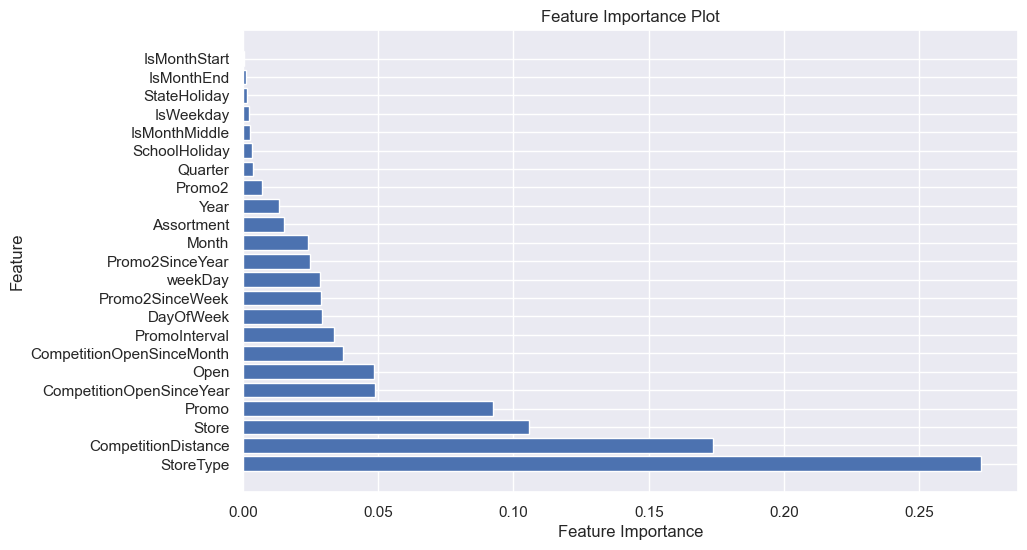

In [23]:
# Define features and target
features = ['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
       'weekDay', 'IsWeekday', 'Quarter', 'IsMonthStart',
       'IsMonthMiddle', 'IsMonthEnd']
target = 'SalesPerCustomer'

# Assuming train_data_merged contains your preprocessed data
train_features = train_merged_data[features]
train_labels = train_merged_data[target]

model = RandomForestRegressor()
model.fit(train_features, train_labels)
# Retrieve feature importance scores
feature_importance = model.feature_importances_

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

In [25]:
model = RandomForestRegressor(n_estimators=100, random_state=45)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=45)

In [26]:
# Assuming you have 'predictions' as your model's predictions
n_bootstraps = 1000  # Number of bootstrap samples
bootstrap_predictions = np.zeros((len(predictions), n_bootstraps))

for i in range(n_bootstraps):
    # Randomly sample data with replacement
    bootstrap_indices = np.random.choice(len(predictions), size=len(predictions), replace=True)
    bootstrap_sample = predictions[bootstrap_indices]

    # Store the sample in the bootstrap_predictions array
    bootstrap_predictions[:, i] = bootstrap_sample

# Calculate percentiles for prediction intervals
lower_percentile = np.percentile(bootstrap_predictions, 2.5, axis=1)
upper_percentile = np.percentile(bootstrap_predictions, 97.5, axis=1)

## 2.5 Serialize models

In [27]:
X = train_merged_data[['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
       'weekDay', 'IsWeekday', 'Quarter', 'IsMonthStart',
       'IsMonthMiddle', 'IsMonthEnd']]
y = train_merged_data['SalesPerCustomer']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [29]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(random_state=45)

In [30]:
from sklearn.metrics import mean_squared_error
random_forest.fit(X_test, y_test)
y_pred_random_forest = random_forest.predict(X_test)
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
print(f'Random Forest MSE: {mse_random_forest}')

Random Forest MSE: 0.04995920128266446


In [31]:
trained_pharmaceutical_sales_model = RandomForestRegressor(n_estimators=100, random_state=45)
trained_pharmaceutical_sales_model.fit(X_test, y_test)

RandomForestRegressor(random_state=45)

In [32]:
import pickle
import datetime

# Example: Assume you have trained a model for Pharmaceutical Sales prediction
# Replace 'model' with your actual trained model
model = trained_pharmaceutical_sales_model

# Generate a timestamp in the desired format (e.g., '10-08-2020-16-32-31-00')
timestamp = datetime.datetime.now().strftime('%d-%m-%Y-%H-%M-%S-%f')[:-3]  # Remove microseconds

# Define the filename with the timestamp
filename = f"{timestamp}.pkl"

# Serialize and save the model to a file with the timestamp
with open(filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved as {filename}")

Model saved as 18-11-2024-23-31-40-476.pkl


In [ ]:
import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from io import BytesIO
import base64
import joblib

# Load your trained model
model_path = r"C:\Users\NITESH NAMDEV\Nexthike projects\Pharmaceutical_Sales_Project 6\18-11-2024-23-31-40-476.pkl"
model = joblib.load(model_path)

# Title
st.title("Rossmann Sales Prediction")

# Sidebar for input
st.sidebar.header("Input Features")
store = st.sidebar.number_input("Store", min_value=1, step=1)
day_of_week = st.sidebar.number_input("Day of Week", min_value=1, max_value=7, step=1)
open_status = st.sidebar.selectbox("Open Status", [0, 1])
promo = st.sidebar.selectbox("Promo", [0, 1])
state_holiday = st.sidebar.selectbox("State Holiday", [0, 1])
school_holiday = st.sidebar.selectbox("School Holiday", [0, 1])
store_type = st.sidebar.number_input("Store Type", min_value=1, step=1)
assortment = st.sidebar.number_input("Assortment", min_value=1, step=1)
competition_distance = st.sidebar.number_input("Competition Distance", min_value=0.0, step=1.0)
competition_open_month = st.sidebar.number_input("Competition Open Month", min_value=1, max_value=12, step=1)
competition_open_year = st.sidebar.number_input("Competition Open Year", min_value=1900, max_value=2100, step=1)
promo2 = st.sidebar.selectbox("Promo2", [0, 1])
promo2_since_week = st.sidebar.number_input("Promo2 Since Week", min_value=1, max_value=52, step=1)
promo2_since_year = st.sidebar.number_input("Promo2 Since Year", min_value=1900, max_value=2100, step=1)
promo_interval = st.sidebar.text_input("Promo Interval", value="None")
weekday = st.sidebar.number_input("Weekday", min_value=1, max_value=7, step=1)
is_weekend = st.sidebar.selectbox("Is Weekend", [0, 1])
sales_per_customer = st.sidebar.number_input("Sales Per Customer", min_value=0.0, step=0.1)
is_month_start = st.sidebar.selectbox("Is Month Start", [0, 1])
is_month_middle = st.sidebar.selectbox("Is Month Middle", [0, 1])
is_month_end = st.sidebar.selectbox("Is Month End", [0, 1])

# Handle promo_interval separately
if promo_interval == "None":
    promo_interval = 0
else:
    promo_interval = float(promo_interval)

# Prediction button
if st.button("Predict Sales for Next 6 Months"):
    # Feature preparation
    input_features_dict = {
        'Store': store,
        'DayOfWeek': day_of_week,
        'Open': open_status,
        'Promo': promo,
        'StateHoliday': state_holiday,
        'SchoolHoliday': school_holiday,
        'StoreType': store_type,
        'Assortment': assortment,
        'CompetitionDistance': competition_distance,
        'CompetitionOpenSinceMonth': competition_open_month,
        'CompetitionOpenSinceYear': competition_open_year,
        'Promo2': promo2,
        'Promo2SinceWeek': promo2_since_week,
        'Promo2SinceYear': promo2_since_year,
        'PromoInterval': promo_interval,
        'weekday': weekday,
        'is_weekend': is_weekend,
        'IsMonthStart': is_month_start,
        'IsMonthMiddle': is_month_middle,
        'IsMonthEnd': is_month_end,
    }

    selected_feature_names = list(input_features_dict.keys())

    feature_indices = {feature: idx for idx, feature in enumerate(selected_feature_names)}

    input_features = np.zeros(len(selected_feature_names))
    for feature, value in input_features_dict.items():
        idx = feature_indices.get(feature)
        if idx is not None:
            input_features[idx] = value

    input_features = input_features.reshape(1, 1, -1)

    # Predict for the next 6 months
    predictions_next_6_months = []
    start_date = pd.to_datetime("2023-09-01")
    for i in range(6):
        predicted_values = model.predict(input_features)
        predicted_value = predicted_values[0][0]
        predictions_next_6_months.append(predicted_value)

        # Update input features
        input_features[0][0][1] += 7
        input_features[0][0][17] += 1
        input_features[0][0][19] += 1

    plot_dates = [start_date + pd.DateOffset(months=i) for i in range(6)]

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(plot_dates, predictions_next_6_months, marker='o', linestyle='-', color='green')
    plt.xlabel("Date")
    plt.ylabel("Sales")
    plt.title("Rossmann Sales Prediction for Next 6 Months")
    plt.grid(True)

    st.pyplot(plt)

    # Show predictions
    for date, prediction in zip(plot_dates, predictions_next_6_months):
        st.write(f"Date: {date.strftime('%Y-%m')} - Predicted Sales: {prediction:.2f}")


2024-11-19 17:45:43.587 
  command:

    streamlit run C:\Users\NITESH NAMDEV\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-11-19 17:45:43.591 Session state does not function when running a script without `streamlit run`
